##Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib as ta

import tensorflow as tf
from keras.layers import LSTM, Bidirectional
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dropout


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4077    0  4077    0     0  22524      0 --:--:-- --:--:-- --:--:-- 22401
100  503k  100  503k    0     0  1063k      0 --:--:-- --:--:-- --:--:-- 1063k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4061    0  4061    0     0  24172      0 --:--:-- --:--:-- --:--:-- 24172
100  406k  100  406k    0     0   859k      0 --:--:-- --:--:-- --:--:--  859k


##Defining Technical Indicators

In [ ]:
def technical_indicators(df,Price):    
    df["sma5"]=ta.SMA(Price, 10)

 
 
index = ["NSEI"]
for data in index:

  #Reading the dataset
  
    df = pd.read_csv((r'/content/WIPRO.NS.csv'))
    df=df.interpolate()
    df=df.rename(columns={"Date": "date", "Open": "open","High": "high", "Low": "low","Close": "close", "Adj Close": "adj close","Volume": "volume"})
    
    df["sma5"]=ta.SMA(df['close'],5)
    df["sma10"]=ta.SMA(df['close'],10)
    #df["sma15"]=ta.SMA(df['close'],15)
    #df["sma20"]=ta.SMA(df['close'],20)
    
    df["ema5"]=ta.EMA(df['close'],5)
    df["ema10"]=ta.EMA(df['close'],10)
    
    df["ADX5"]=ta.ADX(df['high'], df['low'], df['close'], timeperiod=5)
    #df["ADX10"]=ta.ADX(df['high'], df['low'], df['close'], timeperiod=10)
    #df["ADX20"]=ta.ADX(df['high'], df['low'], df['close'], timeperiod=20)
    df["APO"]=ta.APO(df['close'], fastperiod=12, slowperiod=26, matype=0)
    df["CCI5"]=ta.CCI(df['high'], df['low'], df['close'], timeperiod=5)
    #df["CCI10"]=ta.CCI(df['high'], df['low'], df['close'], timeperiod=10)
    #df["CCI15"]=ta.CCI(df['high'], df['low'], df['close'], timeperiod=15)
    macd, macdsignal, macdhist = ta.MACD(df['close'], fastperiod=5, slowperiod=10, signalperiod=9)
    df["macd510"]=macd
    #macd, macdsignal, macdhist = ta.MACD(df['close'], fastperiod=5, slowperiod=20, signalperiod=9)
    #df["macd520"]=macd
    # macd, macdsignal, macdhist = ta.MACD(df['close'], fastperiod=10, slowperiod=20, signalperiod=9)
    # df["macd1020"]=macd
    # macd, macdsignal, macdhist = ta.MACD(df['close'], fastperiod=15, slowperiod=20, signalperiod=9)
    # df["macd1520"]=macd
    # macd, macdsignal, macdhist = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
    # df["macd1226"]=macd
    #df["MFI"]=ta.MFI(df['high'], df['low'], df['close'], df['volume'], timeperiod=14)
    df["MOM10"]=ta.MOM(df['close'], timeperiod=10)
    #df["MOM15"]=ta.MOM(df['close'], timeperiod=15)
    #df["MOM20"]=ta.MOM(df['close'], timeperiod=20)
    df["ROC5"]=ta.ROC(df['close'], timeperiod=5)
    # df["ROC10"]=ta.ROC(df['close'], timeperiod=10)
    # df["ROC20"]=ta.ROC(df['close'], timeperiod=20)
    # df["PPO"]=ta.PPO(df['close'], fastperiod=12, slowperiod=26, matype=0)
    df["RSI14"]=ta.RSI(df['close'], timeperiod=14)
    df["RSI8"]=ta.RSI(df['close'], timeperiod=8)
    
    
    
    fastk, fastd = ta.STOCHF(df['high'], df['low'], df['close'], fastk_period=5, fastd_period=3, fastd_matype=0)
    df["fastk"]=fastk
    df["fastd"]=fastd
    
    
    df["WILLR"]=ta.WILLR(df['high'], df['low'], df['close'], timeperiod=14)
    
    df["ATR"]=ta.ATR(df['high'], df['low'], df['close'], timeperiod=14)
    
    
  
    m=df.min()
   
    
    n=df.max()
    #
    
    df=df.append(m,ignore_index=True)
    df=df.append(n,ignore_index=True)
    df.to_csv('data1.csv', index=False)
    print(df)
    print(len(df))

            date        open        high         low       close   adj close  \
0       1/2/2007  135.675003  138.330002  135.518005  137.598999   82.201279   
1       1/3/2007  137.699997  139.916000  136.598007  139.544998   83.363831   
2       1/4/2007  139.949997  139.949997  136.125000  136.462006   81.522064   
3       1/5/2007  137.024994  137.250000  133.875000  134.561005   80.386398   
4       1/8/2007  134.100006  134.662994  129.600006  130.162994   77.759041   
...          ...         ...         ...         ...         ...         ...   
3156  10/18/2019  247.850006  250.699997  247.850006  248.899994  248.899994   
3157  10/22/2019  249.000000  254.449997  247.100006  253.550003  253.550003   
3158  10/23/2019  252.800003  255.550003  250.050003  254.350006  254.350006   
3159    1/1/2008   45.292500   46.113800   40.590000   45.202499   29.922930   
3160    9/9/2019  344.519989  344.519989  344.519989  344.519989  299.149994   

          volume        sma5       sma1

## Reading Updated data with Technical Indictaors

In [ ]:
df1 = pd.read_csv('data1.csv')
print(df1.head())

       date        open        high         low       close  adj close  \
0  1/2/2007  135.675003  138.330002  135.518005  137.598999  82.201279   
1  1/3/2007  137.699997  139.916000  136.598007  139.544998  83.363831   
2  1/4/2007  139.949997  139.949997  136.125000  136.462006  81.522064   
3  1/5/2007  137.024994  137.250000  133.875000  134.561005  80.386398   
4  1/8/2007  134.100006  134.662994  129.600006  130.162994  77.759041   

      volume     sma5  sma10     ema5  ...        CCI5  macd510  MOM10  ROC5  \
0  2135196.0      NaN    NaN      NaN  ...         NaN      NaN    NaN   NaN   
1  4827356.0      NaN    NaN      NaN  ...         NaN      NaN    NaN   NaN   
2  3837520.0      NaN    NaN      NaN  ...         NaN      NaN    NaN   NaN   
3  2771787.0      NaN    NaN      NaN  ...         NaN      NaN    NaN   NaN   
4  3708889.0  135.666    NaN  135.666  ... -142.163044      NaN    NaN   NaN   

   RSI14  RSI8  fastk  fastd  WILLR  ATR  
0    NaN   NaN    NaN    NaN   

Lets see how last few entries look like.

In [ ]:
print(df1.tail())

            date        open        high         low       close   adj close  \
3156  10/18/2019  247.850006  250.699997  247.850006  248.899994  248.899994   
3157  10/22/2019  249.000000  254.449997  247.100006  253.550003  253.550003   
3158  10/23/2019  252.800003  255.550003  250.050003  254.350006  254.350006   
3159    1/1/2008   45.292500   46.113800   40.590000   45.202499   29.922930   
3160    9/9/2019  344.519989  344.519989  344.519989  344.519989  299.149994   

          volume        sma5       sma10        ema5  ...        CCI5  \
3156   2764389.0  246.549997  242.389998  246.411379  ...   70.054938   
3157   6273193.0  248.569998  243.974999  248.790920  ...  118.042267   
3158   2673314.0  250.710001  245.704999  250.643949  ...  111.459067   
3159         0.0   46.100239   46.999119   46.466153  ... -166.666667   
3160  50690178.0  298.469995  296.774997  298.019910  ...  166.666667   

        macd510       MOM10        ROC5      RSI14       RSI8       fastk  \
315

##Reindexing dataframe

In [ ]:
df1=df1.drop(index=df1.index[np.arange(28)],axis=0)
df1=df1.drop(index=df1.index[len(df1)-1],axis=0)
df1=df1.drop(index=df1.index[len(df1)-1],axis=0)
df1 = df1.reset_index(drop=True)
print(len(df1))

3131


Lets see how first few entries look like.

In [ ]:
print(df1.head())

        date        open        high         low       close  adj close  \
0  2/13/2007  141.524994  146.024994  140.399994  143.505005  85.729515   
1  2/14/2007  143.505005  147.149994  140.703995  146.294998  87.396240   
2  2/15/2007  146.250000  153.731003  146.250000  152.324997  90.998558   
3  2/19/2007  153.225006  155.475006  152.246002  153.281006  91.569679   
4  2/20/2007  150.750000  153.731003  148.759003  149.455994  89.284615   

      volume        sma5       sma10        ema5  ...        CCI5   macd510  \
0  3085578.0  143.529602  142.579002  143.191132  ...  -43.056529  0.364844   
1  3112098.0  143.862601  143.410402  144.225754  ...   97.123743  0.768903   
2  4987587.0  145.732400  144.641101  146.925502  ...  166.666667  1.856335   
3  3328422.0  147.449200  145.499501  149.044003  ...  106.742023  2.481824   
4  1751431.0  148.972400  146.183501  149.181333  ...   36.639385  2.093039   

       MOM10      ROC5      RSI14       RSI8      fastk      fastd      WI

In [ ]:
print(df1.tail())

            date        open        high         low       close   adj close  \
3126  10/16/2019  245.899994  251.699997  244.000000  248.899994  248.899994   
3127  10/17/2019  248.899994  250.149994  246.600006  247.850006  247.850006   
3128  10/18/2019  247.850006  250.699997  247.850006  248.899994  248.899994   
3129  10/22/2019  249.000000  254.449997  247.100006  253.550003  253.550003   
3130  10/23/2019  252.800003  255.550003  250.050003  254.350006  254.350006   

          volume        sma5       sma10        ema5  ...        CCI5  \
3126  16285829.0  242.929996  239.649999  243.825605  ...  146.178066   
3127   5162240.0  244.659998  241.084999  245.167072  ...   83.333383   
3128   2764389.0  246.549997  242.389998  246.411379  ...   70.054938   
3129   6273193.0  248.569998  243.974999  248.790920  ...  118.042267   
3130   2673314.0  250.710001  245.704999  250.643949  ...  111.459067   

       macd510      MOM10      ROC5      RSI14       RSI8      fastk  \
3126  1.

In [ ]:
df1.reindex()

,date,open,high,low,close,adj close,volume,sma5,sma10,ema5,...,CCI5,macd510,MOM10,ROC5,RSI14,RSI8,fastk,fastd,WILLR,ATR
0,2/13/2007,141.524994,146.024994,140.399994,143.505005,85.729515,3085578.0,143.529602,142.579002,143.191132,...,-43.056529,0.364844,1.687012,0.472592,54.161426,53.333978,55.200196,51.068040,-57.230735,4.479809
1,2/14/2007,143.505005,147.149994,140.703995,146.294998,87.396240,3112098.0,143.862601,143.410402,144.225754,...,97.123743,0.768903,8.313995,1.151209,58.051479,60.404302,87.333393,54.177799,-38.153860,4.620251
2,2/15/2007,146.250000,153.731003,146.250000,152.324997,90.998558,4987587.0,145.732400,144.641101,146.925502,...,166.666667,1.856335,12.306992,6.538859,64.970665,71.187102,89.453116,77.328902,-8.531071,4.824591
3,2/19/2007,153.225006,155.475006,152.246002,153.281006,91.569679,3328422.0,147.449200,145.499501,149.044003,...,106.742023,2.481824,8.584000,5.932396,65.930149,72.541948,85.446114,87.410874,-12.038405,4.710620
4,2/20/2007,150.750000,153.731003,148.759003,149.455994,89.284615,1751431.0,148.972400,146.183501,149.181333,...,36.639385,2.093039,6.839997,5.369429,58.970370,59.704642,60.072921,78.324050,-33.026118,4.729290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,10/16/2019,245.899994,251.699997,244.000000,248.899994,248.899994,16285829.0,242.929996,239.649999,243.825605,...,146.178066,1.994787,9.099991,4.689798,58.623123,72.039517,82.389912,82.615990,-14.358990,5.563089
3127,10/17/2019,248.899994,250.149994,246.600006,247.850006,247.850006,5162240.0,244.659998,241.084999,245.167072,...,83.333383,2.241856,14.350006,3.616225,56.715897,67.723693,74.671107,79.329595,-19.743544,5.419296
3128,10/18/2019,247.850006,250.699997,247.850006,248.899994,248.899994,2764389.0,246.549997,242.389998,246.411379,...,70.054938,2.399840,13.049988,3.946543,58.181076,69.791964,79.562017,78.874345,-14.358990,5.235774
3129,10/22/2019,249.000000,254.449997,247.100006,253.550003,253.550003,6273193.0,248.569998,243.974999,248.790920,...,118.042267,3.045115,15.850006,4.148698,63.993962,77.189920,94.078986,82.770703,-4.044917,5.386790


In [ ]:
df1.index = pd.to_datetime(df1['date'])
df1

,date,open,high,low,close,adj close,volume,sma5,sma10,ema5,...,CCI5,macd510,MOM10,ROC5,RSI14,RSI8,fastk,fastd,WILLR,ATR
date,,,,,,,,,,,,,,,,,,,,,
2007-02-13,2/13/2007,141.524994,146.024994,140.399994,143.505005,85.729515,3085578.0,143.529602,142.579002,143.191132,...,-43.056529,0.364844,1.687012,0.472592,54.161426,53.333978,55.200196,51.068040,-57.230735,4.479809
2007-02-14,2/14/2007,143.505005,147.149994,140.703995,146.294998,87.396240,3112098.0,143.862601,143.410402,144.225754,...,97.123743,0.768903,8.313995,1.151209,58.051479,60.404302,87.333393,54.177799,-38.153860,4.620251
2007-02-15,2/15/2007,146.250000,153.731003,146.250000,152.324997,90.998558,4987587.0,145.732400,144.641101,146.925502,...,166.666667,1.856335,12.306992,6.538859,64.970665,71.187102,89.453116,77.328902,-8.531071,4.824591
2007-02-19,2/19/2007,153.225006,155.475006,152.246002,153.281006,91.569679,3328422.0,147.449200,145.499501,149.044003,...,106.742023,2.481824,8.584000,5.932396,65.930149,72.541948,85.446114,87.410874,-12.038405,4.710620
2007-02-20,2/20/2007,150.750000,153.731003,148.759003,149.455994,89.284615,1751431.0,148.972400,146.183501,149.181333,...,36.639385,2.093039,6.839997,5.369429,58.970370,59.704642,60.072921,78.324050,-33.026118,4.729290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-16,10/16/2019,245.899994,251.699997,244.000000,248.899994,248.899994,16285829.0,242.929996,239.649999,243.825605,...,146.178066,1.994787,9.099991,4.689798,58.623123,72.039517,82.389912,82.615990,-14.358990,5.563089
2019-10-17,10/17/2019,248.899994,250.149994,246.600006,247.850006,247.850006,5162240.0,244.659998,241.084999,245.167072,...,83.333383,2.241856,14.350006,3.616225,56.715897,67.723693,74.671107,79.329595,-19.743544,5.419296
2019-10-18,10/18/2019,247.850006,250.699997,247.850006,248.899994,248.899994,2764389.0,246.549997,242.389998,246.411379,...,70.054938,2.399840,13.049988,3.946543,58.181076,69.791964,79.562017,78.874345,-14.358990,5.235774


In [ ]:
df1_close = pd.DataFrame(df1['close'])
df1_close.index = pd.to_datetime(df1['date'])


In [ ]:
df1_close.index

DatetimeIndex(['2007-02-13', '2007-02-14', '2007-02-15', '2007-02-19',
               '2007-02-20', '2007-02-21', '2007-02-22', '2007-02-23',
               '2007-02-26', '2007-02-27',
               ...
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14',
               '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
               '2019-10-22', '2019-10-23'],
              dtype='datetime64[ns]', name='date', length=3131, freq=None)

In [ ]:
df1_close.describe()

,close
count,3131.000000
mean,170.797056
std,52.752986
min,45.202499
25%,133.803505
50%,170.080994
75%,209.587006
max,344.519989


##Plottting Time Series

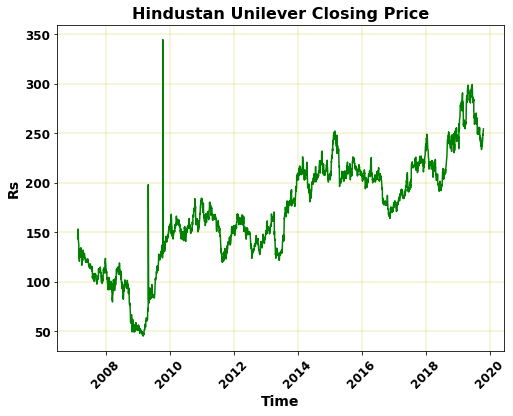

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(8, 6))
plt.plot(df1_close, color='g')
plt.title('Wipro Closing Price', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('Rs', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.3)

#Autocorrelation Plot

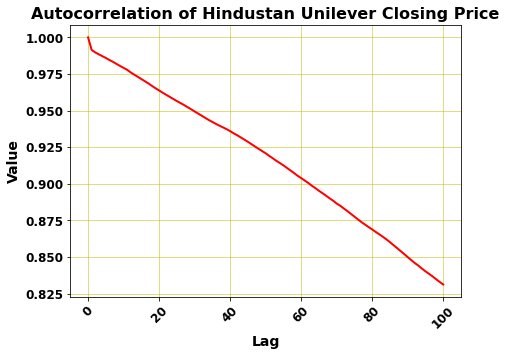

In [ ]:
from statsmodels.tsa import stattools

acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(df1_close, #acf=auto correlation function
                                                             unbiased=True,
                                                             nlags=100,
                                                             qstat=True,
                                                             fft=True,
                                                             alpha = 0.05)#95% confidence intervels are returned
                                                             

#return acf,   ,   ,
plt.figure(figsize=(7, 5))
plt.plot(pd.Series(acf_djia), color='r', linewidth=2)
plt.title('Autocorrelation of Hindustan Unilever Closing Price', weight='bold', fontsize=16)
plt.xlabel('Lag', weight='bold', fontsize=14)
plt.ylabel('Value', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

##Creation of dataset for training

In [ ]:
def create_regressor_attributes(df1, attribute, list_of_prev_t_instants) :
    
    """
    Ensure that the index is of datetime type
    Creates features with previous time instant values
    """
        
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df1)               
    df1['datetime'] = df1.index
    df1.reset_index(drop=True)

    df1_copy = df1[start:end]
    df1_copy.reset_index(inplace=True, drop=True)

    for attribute in attribute :
            foobar = pd.DataFrame()

            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df1[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop=True, inplace=True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort=False, axis=1)

            df1_copy = pd.concat([df1_copy, foobar], sort=False, axis=1)
            
    df1_copy.set_index(['datetime'], drop=True, inplace=True)
    return df1_copy

#Time lag of 5_days

In [ ]:
list_of_attributes = ['close']

list_of_prev_t_instants = []
for i in range(1,6):
    list_of_prev_t_instants.append(i)

list_of_prev_t_instants

[1, 2, 3, 4, 5]

In [ ]:
df1_new = create_regressor_attributes(df1_close, list_of_attributes, list_of_prev_t_instants)
df1_new

,close,close_(t-1),close_(t-2),close_(t-3),close_(t-4),close_(t-5)
datetime,,,,,,
2007-02-21,150.389999,149.455994,153.281006,152.324997,146.294998,143.505005
2007-02-22,146.216003,150.389999,149.455994,153.281006,152.324997,146.294998
2007-02-23,140.242004,146.216003,150.389999,149.455994,153.281006,152.324997
2007-02-26,138.059998,140.242004,146.216003,150.389999,149.455994,153.281006
2007-02-27,136.024002,138.059998,140.242004,146.216003,150.389999,149.455994
...,...,...,...,...,...,...
2019-10-16,248.899994,243.649994,243.449997,239.449997,239.199997,237.750000
2019-10-17,247.850006,248.899994,243.649994,243.449997,239.449997,239.199997
2019-10-18,248.899994,247.850006,248.899994,243.649994,243.449997,239.449997


Checking Dimension

In [ ]:
df1_new.shape


(3126, 6)

In [ ]:
df1_new1 = pd.concat([df1.iloc[5:,:], df1_new.iloc[:,1:]], axis=1)#df1_new.iloc[:,1:
# df1_new1.drop(['datetime'], axis = 1, inplace = True)
# df1_new1.reset_index(inplace=True)
df1_new1=df1_new1.drop(['date'], axis = 1)
# df1_new1.reset_index(inplace=True)
df1_new1= df1_new1.reset_index()
del df1_new1['index']
df1_new1

,open,high,low,close,adj close,volume,sma5,sma10,ema5,ema10,...,RSI8,fastk,fastd,WILLR,ATR,close_(t-1),close_(t-2),close_(t-3),close_(t-4),close_(t-5)
0,148.916000,152.438004,147.621994,150.389999,89.842606,4053929.0,150.349399,146.939500,149.584222,147.688485,...,61.600970,65.574415,70.364483,-31.023154,4.735484,149.455994,153.281006,152.324997,146.294998,143.505005
1,150.389999,153.438995,144.281006,146.216003,87.349052,6444413.0,150.333600,147.098100,148.461482,147.420761,...,49.663986,17.286019,47.644452,-61.419540,5.051378,150.389999,149.455994,153.281006,152.324997,146.294998
2,150.074997,150.074997,139.500000,140.242004,83.780197,4237564.0,147.917001,146.824701,145.721656,146.115532,...,37.710921,4.644781,29.168405,-95.355219,5.445922,146.216003,150.389999,149.455994,153.281006,152.324997
3,140.625000,141.276993,133.537994,138.059998,82.476685,5787547.0,144.872800,146.161000,143.167770,144.650890,...,34.268129,22.393909,14.774903,-79.386418,5.609713,140.242004,146.216003,150.389999,149.455994,153.281006
4,138.375000,139.455002,127.698997,136.024002,81.260399,4637453.0,142.186401,145.579401,140.786514,143.082365,...,31.227944,32.342679,19.793790,-70.028074,6.048734,138.059998,140.242004,146.216003,150.389999,149.455994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,245.899994,251.699997,244.000000,248.899994,248.899994,16285829.0,242.929996,239.649999,243.825605,241.830818,...,72.039517,82.389912,82.615990,-14.358990,5.563089,243.649994,243.449997,239.449997,239.199997,237.750000
3122,248.899994,250.149994,246.600006,247.850006,247.850006,5162240.0,244.659998,241.084999,245.167072,242.925216,...,67.723693,74.671107,79.329595,-19.743544,5.419296,248.899994,243.649994,243.449997,239.449997,239.199997
3123,247.850006,250.699997,247.850006,248.899994,248.899994,2764389.0,246.549997,242.389998,246.411379,244.011539,...,69.791964,79.562017,78.874345,-14.358990,5.235774,247.850006,248.899994,243.649994,243.449997,239.449997
3124,249.000000,254.449997,247.100006,253.550003,253.550003,6273193.0,248.569998,243.974999,248.790920,245.745805,...,77.189920,94.078986,82.770703,-4.044917,5.386790,248.899994,247.850006,248.899994,243.649994,243.449997


In [ ]:

# Move last column to the first

temp_cols=df1_new1.columns.tolist()
new_cols=temp_cols[0:3] + temp_cols[4:] + temp_cols[3:4]
df1_new1=df1_new1[new_cols]
print(df1_new1)


            open        high         low   adj close      volume        sma5  \
0     148.916000  152.438004  147.621994   89.842606   4053929.0  150.349399   
1     150.389999  153.438995  144.281006   87.349052   6444413.0  150.333600   
2     150.074997  150.074997  139.500000   83.780197   4237564.0  147.917001   
3     140.625000  141.276993  133.537994   82.476685   5787547.0  144.872800   
4     138.375000  139.455002  127.698997   81.260399   4637453.0  142.186401   
...          ...         ...         ...         ...         ...         ...   
3121  245.899994  251.699997  244.000000  248.899994  16285829.0  242.929996   
3122  248.899994  250.149994  246.600006  247.850006   5162240.0  244.659998   
3123  247.850006  250.699997  247.850006  248.899994   2764389.0  246.549997   
3124  249.000000  254.449997  247.100006  253.550003   6273193.0  248.569998   
3125  252.800003  255.550003  250.050003  254.350006   2673314.0  250.710001   

           sma10        ema5       ema1

Dropping if some NA entries are there.

In [ ]:
df1_new1=df1_new1.dropna()

In [ ]:
df1_new1.shape

(3126, 27)

Splitting the data

In [ ]:
df1_new1.tail()

,open,high,low,adj close,volume,sma5,sma10,ema5,ema10,ADX5,...,fastk,fastd,WILLR,ATR,close_(t-1),close_(t-2),close_(t-3),close_(t-4),close_(t-5),close
3121,245.899994,251.699997,244.000000,248.899994,16285829.0,242.929996,239.649999,243.825605,241.830818,43.726460,...,82.389912,82.615990,-14.358990,5.563089,243.649994,243.449997,239.449997,239.199997,237.750000,248.899994
3122,248.899994,250.149994,246.600006,247.850006,5162240.0,244.659998,241.084999,245.167072,242.925216,50.818142,...,74.671107,79.329595,-19.743544,5.419296,248.899994,243.649994,243.449997,239.449997,239.199997,247.850006
3123,247.850006,250.699997,247.850006,248.899994,2764389.0,246.549997,242.389998,246.411379,244.011539,56.765447,...,79.562017,78.874345,-14.358990,5.235774,247.850006,248.899994,243.649994,243.449997,239.449997,248.899994
3124,249.000000,254.449997,247.100006,253.550003,6273193.0,248.569998,243.974999,248.790920,245.745805,62.920740,...,94.078986,82.770703,-4.044917,5.386790,248.899994,247.850006,248.899994,243.649994,243.449997,253.550003
3125,252.800003,255.550003,250.050003,254.350006,2673314.0,250.710001,245.704999,250.643949,247.310205,68.135039,...,89.610418,87.750474,-5.139172,5.394876,253.550003,248.899994,247.850006,248.899994,243.649994,254.350006


##Data Dividation into Training, Validation & Testing parts.

In [ ]:
test_set_size = 0.05
# valid_set_size= 0.05

df1_copy = df1_new1.reset_index(drop=True)

df1_test = df1_copy.iloc[ int(np.floor(len(df1_copy)*(1-test_set_size))) : ]
df1_train = df1_copy.iloc[ : int(np.floor(len(df1_copy)*(1-test_set_size))) ]

# df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid))) ]
# df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) : ]


X_train, y_train = df1_train.iloc[:, 0:-1], df1_train.iloc[:, -1]
# X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
X_test, y_test = df1_test.iloc[:, 0:-1], df1_test.iloc[:, -1]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
# print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (2969, 26) (2969,)
Shape of test inputs, test target: (157, 26) (157,)


In [ ]:
X_train.head()

,open,high,low,adj close,volume,sma5,sma10,ema5,ema10,ADX5,...,RSI8,fastk,fastd,WILLR,ATR,close_(t-1),close_(t-2),close_(t-3),close_(t-4),close_(t-5)
0,148.916000,152.438004,147.621994,89.842606,4053929.0,150.349399,146.939500,149.584222,147.688485,30.631352,...,61.600970,65.574415,70.364483,-31.023154,4.735484,149.455994,153.281006,152.324997,146.294998,143.505005
1,150.389999,153.438995,144.281006,87.349052,6444413.0,150.333600,147.098100,148.461482,147.420761,28.711129,...,49.663986,17.286019,47.644452,-61.419540,5.051378,150.389999,149.455994,153.281006,152.324997,146.294998
2,150.074997,150.074997,139.500000,83.780197,4237564.0,147.917001,146.824701,145.721656,146.115532,32.392609,...,37.710921,4.644781,29.168405,-95.355219,5.445922,146.216003,150.389999,149.455994,153.281006,152.324997
3,140.625000,141.276993,133.537994,82.476685,5787547.0,144.872800,146.161000,143.167770,144.650890,38.932820,...,34.268129,22.393909,14.774903,-79.386418,5.609713,140.242004,146.216003,150.389999,149.455994,153.281006
4,138.375000,139.455002,127.698997,81.260399,4637453.0,142.186401,145.579401,140.786514,143.082365,46.216420,...,31.227944,32.342679,19.793790,-70.028074,6.048734,138.059998,140.242004,146.216003,150.389999,149.455994


In [ ]:
y_train

0       150.389999
1       146.216003
2       140.242004
3       138.059998
4       136.024002
           ...    
2964    272.587006
2965    279.149994
2966    280.912994
2967    284.062012
2968    289.049988
Name: close, Length: 2969, dtype: float64

In [ ]:
y_test

2969    290.737000
2970    280.799988
2971    276.674988
2972    281.774994
2973    272.700012
           ...    
3121    248.899994
3122    247.850006
3123    248.899994
3124    253.550003
3125    254.350006
Name: close, Length: 157, dtype: float64

Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
# X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
# y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [ ]:
X_train_scaled=X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],1)
y_test_scaled=y_test_scaled.reshape(y_test_scaled.shape[0],y_test_scaled.shape[1],1)

In [ ]:
X_test_scaled.shape

(157, 26)

#Making BiLSTM Model

In [ ]:

#BiLSTM
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape= (X_train_scaled.shape))))

regressor.add(Bidirectional(LSTM(units=50)))

regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train_scaled, y_train_scaled, epochs=5, batch_size=32)


Epoch 1/5
93/93 [==============================] - 14s 65ms/step - loss: 0.0071
Epoch 2/5
93/93 [==============================] - 6s 64ms/step - loss: 2.0001e-04
Epoch 3/5
93/93 [==============================] - 6s 65ms/step - loss: 1.7949e-04
Epoch 4/5
93/93 [==============================] - 6s 65ms/step - loss: 1.7044e-04
Epoch 5/5
93/93 [==============================] - 6s 64ms/step - loss: 1.6723e-04


Summarising the Model

In [ ]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 26, 200)          81600     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 100)              100400    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 182,101
Trainable params: 182,101
Non-trainable params: 0
_________________________________________________________________


##  Making Predictions on Test Data

In [ ]:
y_hat = regressor.predict(X_test_scaled)
y_hat_rescaled = Target_scaler.inverse_transform(y_hat)

In [ ]:
y_hat_rescaled.shape

(157, 1)

In [ ]:
y_test_scaled=y_test_scaled.reshape(y_test_scaled.shape[:-1])

In [ ]:
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)

#R2 score

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
score = r2_score(y_test_rescaled, y_hat_rescaled)
print('R-squared score for the test set:', round(score,4))

R-squared score for the test set: 0.9541


#Mean Squared Error

In [ ]:
mse_score=mean_squared_error(y_test_scaled, y_hat)
print(mse_score)

0.0034448897848882087


#RMSE

In [ ]:
rmse_score=math.sqrt(mse_score)
rmse_score

0.058693183461865556

#Mean absolute percentage error

In [ ]:
mape_score=mean_absolute_percentage_error(y_test_rescaled, y_hat_rescaled)
mape_score

0.011498244176627932

##Visualization

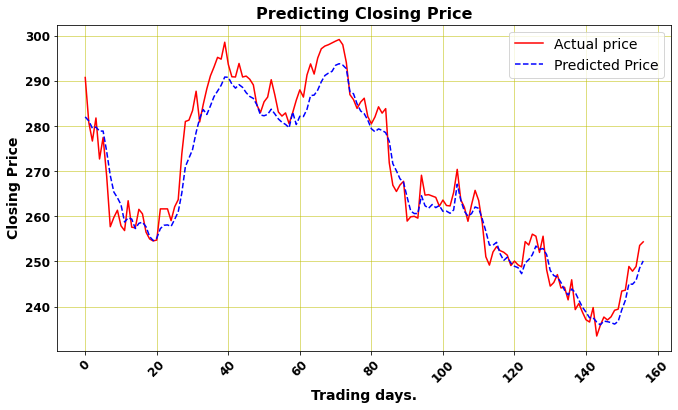

In [ ]:
plt.figure(figsize=(11, 6))
plt.plot(y_test_rescaled, linestyle='solid', color='r')
plt.plot(y_hat_rescaled, linestyle='dashed', color='b')

plt.legend(['Actual price','Predicted Price'], loc='best', prop={'size': 14})
plt.title('Predicting Closing Price', weight='bold', fontsize=16)
plt.ylabel('Closing Price', weight='bold', fontsize=14)
plt.xlabel('Trading days.', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth='0.5')
plt.show()